In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset

# https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data?utm_source=chatgpt.com -> dataset link
df = pd.read_csv('./dataset/data1.csv', encoding='latin1')
# Display first few rows
df.head()



C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_8524\4257387796.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset/data1.csv', encoding='latin1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [8]:
# Check dataset info
print(df.info())

# Check missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [9]:
#data cleaning and preprocessing steps below
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with missing key pollutant values
df = df.dropna(subset=['so2', 'no2'])

# Fill PM2.5 missing values with mean (optional)
if 'pm2_5' in df.columns:
    df['pm2_5'].fillna(df['pm2_5'].mean(), inplace=True)

# Check cleaned data
print(df.describe())


                 so2            no2           rspm            spm  \
count  399097.000000  399097.000000  365036.000000  170704.000000   
mean       10.843400      26.198725     110.466152     226.877492   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.000000      14.000000      57.000000     115.000000   
50%         8.000000      22.000000      92.000000     194.000000   
75%        13.700000      32.900000     144.000000     306.000000   
max       909.000000     876.000000    6307.033333    3380.000000   
std        11.186017      18.549774      75.336928     153.521550   

               pm2_5                           date  
count  399097.000000                         399093  
mean       40.546923  2010-03-23 18:30:08.835534592  
min         3.000000            1987-01-01 00:00:00  
25%        40.546923            2007-09-28 00:00:00  
50%        40.546923            2011-03-16 00:00:00  
75%        40.546923            2013-10-31 00:00:00  


C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_8524\3351991457.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pm2_5'].fillna(df['pm2_5'].mean(), inplace=True)


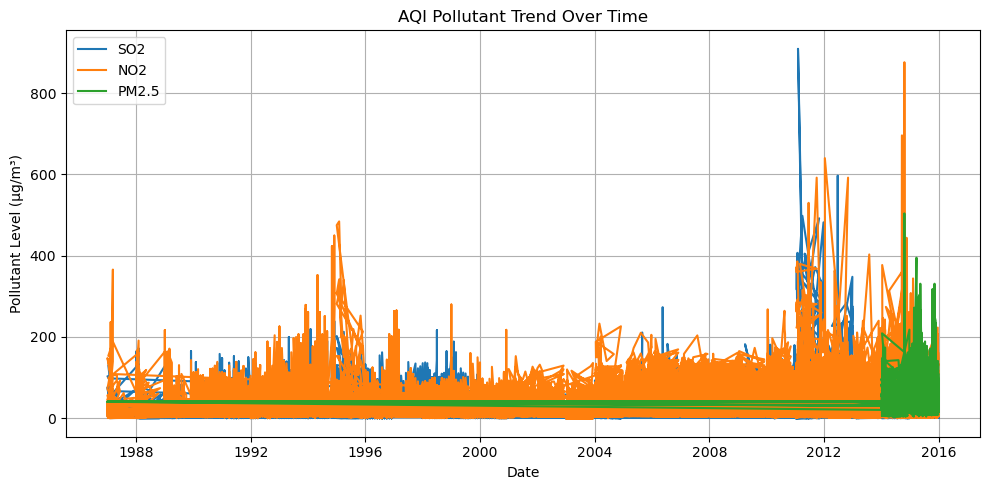

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['so2'], label='SO2', linewidth=1.5)
plt.plot(df['date'], df['no2'], label='NO2', linewidth=1.5)
if 'pm2_5' in df.columns:
    plt.plot(df['date'], df['pm2_5'], label='PM2.5', linewidth=1.5)
plt.xlabel('Date')
plt.ylabel('Pollutant Level (µg/m³)')
plt.title('AQI Pollutant Trend Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


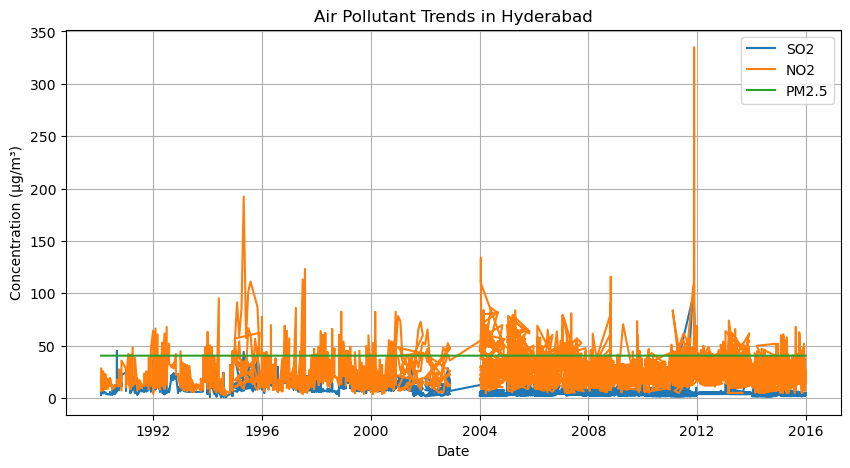

In [12]:
#  Pollutant Trends by City/Location
# Filter for a specific location
city = "Hyderabad"
city_data = df[df['location'] == city]

plt.figure(figsize=(10,5))
plt.plot(city_data['date'], city_data['so2'], label='SO2')
plt.plot(city_data['date'], city_data['no2'], label='NO2')
if 'pm2_5' in city_data.columns:
    plt.plot(city_data['date'], city_data['pm2_5'], label='PM2.5')

plt.title(f'Air Pollutant Trends in {city}')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()


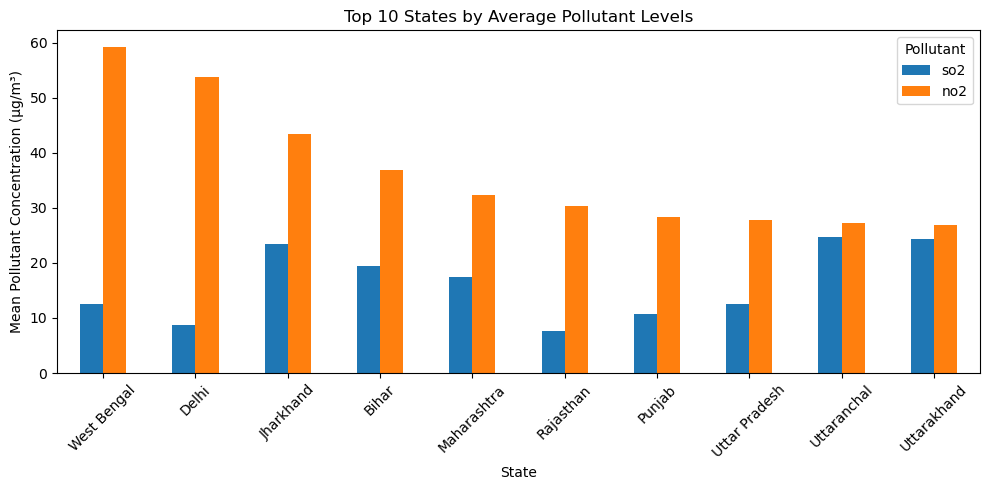

In [13]:
# Compare AQI Values Across Cities (Bar Plot)
# Calculate mean pollutant levels by state
city_avg = df.groupby('state')[['so2', 'no2']].mean().sort_values(by='no2', ascending=False).head(10)

# Bar plot
city_avg.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 States by Average Pollutant Levels')
plt.ylabel('Mean Pollutant Concentration (µg/m³)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()


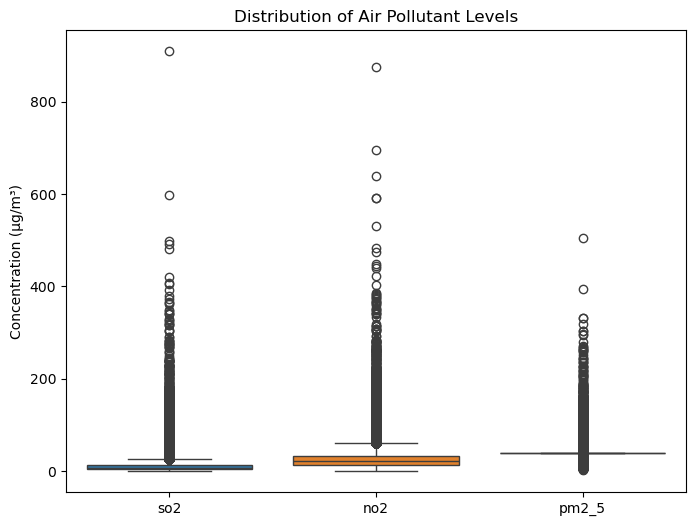

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['so2', 'no2', 'pm2_5']])
plt.title("Distribution of Air Pollutant Levels")
plt.ylabel("Concentration (µg/m³)")
plt.show()


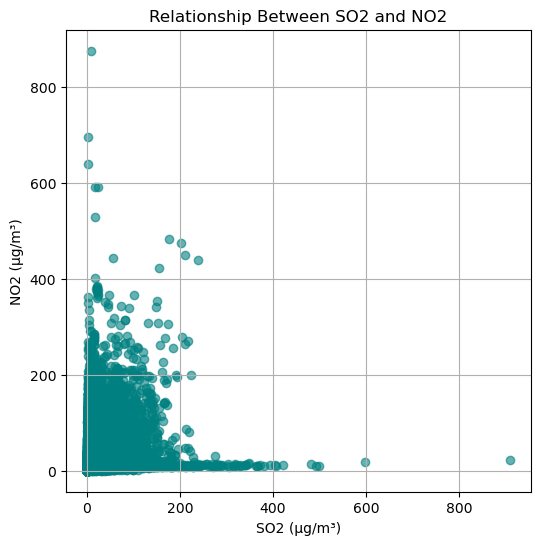

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(df['so2'], df['no2'], alpha=0.6, color='teal')
plt.xlabel('SO2 (µg/m³)')
plt.ylabel('NO2 (µg/m³)')
plt.title('Relationship Between SO2 and NO2')
plt.grid(True)
plt.show()


In [ ]:
plt.style.use('seaborn-v0_8-colorblind')
sns.set_palette('coolwarm')

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='date', y='no2', color='crimson', label='NO2')
sns.lineplot(data=df, x='date', y='so2', color='navy', label='SO2')
plt.title('Air Quality Trend Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Pollutant Level (µg/m³)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
